In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import glob
import os
import scipy.stats
from matplotlib import cm
import seaborn as sns
import dask
import pickle
from datetime import datetime
import ast

In [2]:
models = [x.split('/')[-1] for x in glob.glob("/terra/data/cmip5/global/rcp85/*")]   

In [3]:
dic = pickle.load(open("monthly_pr_dic.p", "rb")) #note: pickle sometimes breaks if packages are updates - if so need to re run pr_compute 

In [4]:
for index in dic:
    date_string = str('1/'+str(dic[index].time[0].dt.month.values)+'/'+str(dic[index].time[0].dt.year.values))
    start = datetime.strptime(date_string, "%d/%m/%Y")
    x = pd.date_range(start, periods=len(dic[index].time), freq='M')
    dic[index]['time'] = x

In [45]:
rolled={}
for index in dic:
    rolled[index] = dic[index].load().rolling(time = 504).mean()
    
selled = {}
for index in dic:
    selled[index] = rolled[index].sel(time = slice('1979','2080'))

In [46]:
cmip = [model for model in models if model in dic.keys()]

In [47]:
col_dic = pickle.load(open('../../scores/col_dic.p','rb'))

file = open("../../genealogy/Knutti_colours_dict.txt", "r")
contents = file.read()
knutti_dic = ast.literal_eval(contents)
file.close()

In [48]:
selled['ACCESS1-0'] = selled['ACCESS1-0']+0.15e-6
selled['BNU-ESM'] = selled['BNU-ESM']-1e-6
selled['inmcm4'] = selled['inmcm4']-0.2e-6
selled['MIROC-ESM-CHEM'] = selled['MIROC-ESM-CHEM']-0.2e-6

In [49]:
maximum=[]
minimum=[]

for i in range(len(selled['ACCESS1-0'])):
    vals = []
    for model in ['MIROC5' , 'CESM1-CAM5' ,'MIROC-ESM-CHEM', 'ACCESS1-0' , 'GFDL-ESM2M', 'BNU-ESM', 'GISS-E2-R-CC']:
        vals.append(selled[model].values[i])
    minimum.append(np.nanmin(vals))
    maximum.append(np.nanmax(vals))
    
    

sel_range = xr.Dataset(dict(maximum = (["time"], maximum),minimum = (["time"], minimum)) ,coords=dict(time = selled['ACCESS1-0'].time))

In [50]:
plt.rcParams.update({'font.size': 22})

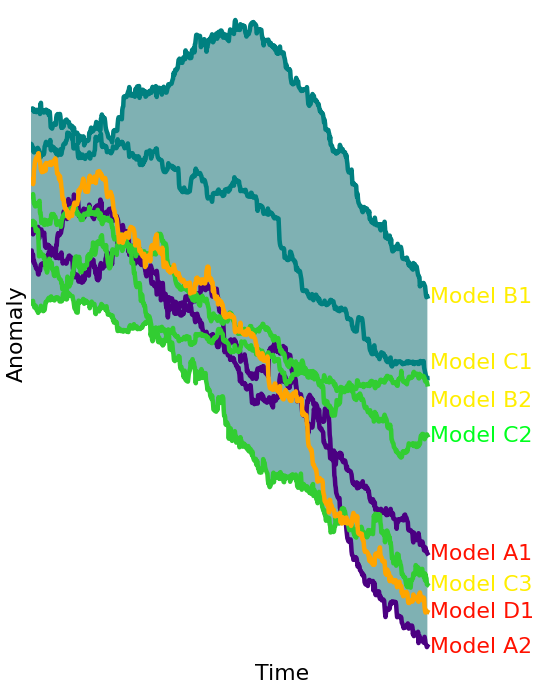

In [51]:
subset = cmip#['MIROC-ESM-CHEM' , 'BNU-ESM' , 'CNRM-CM5' , 'ACCESS1-0', 'GFDL-CM3', 'bcc-csm1-1-m']
fig,ax = plt.subplots(figsize=(9, 12))
    
    
selled['MIROC5'].plot(color = 'indigo' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['MIROC5'].dropna(dim='time').values[-1]), xytext=(3,0), textcoords='offset points', text=str('Model A1'), va='center',color = '#ff1100')
selled['MIROC-ESM-CHEM'].plot(color = 'indigo' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['MIROC-ESM-CHEM'].dropna(dim='time').values[-1]), xytext=(3,0), textcoords='offset points', text=str('Model A2'), va='center',color = '#ff1100')


selled['ACCESS1-0'].plot(color = 'teal' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['ACCESS1-0'].dropna(dim='time').values[-1]), xytext=(3,0), textcoords='offset points', text=str('Model B1'), va='center',color = '#ffee00')
selled['GFDL-ESM2M'].plot(color = 'teal' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['GFDL-ESM2M'].dropna(dim='time').values[-1]-0.15e-6), xytext=(3,0), textcoords='offset points', text=str('Model B2'), va='center',color = '#ffee00')


selled['BNU-ESM'].plot(color = 'limegreen' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['BNU-ESM'].dropna(dim='time').values[-1]+0.15e-6), xytext=(3,0), textcoords='offset points', text=str('Model C1'), va='center',color = '#ffee00')
selled['inmcm4'].plot(color = 'limegreen' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['inmcm4'].dropna(dim='time').values[-1]), xytext=(3,0), textcoords='offset points', text=str('Model C2'), va='center',color = '#00ff1e')
selled['GISS-E2-R-CC'].plot(color = 'limegreen' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['GISS-E2-R-CC'].dropna(dim='time').values[-1]), xytext=(3,0), textcoords='offset points', text=str('Model C3'), va='center',color = '#ffee00')


selled['CESM1-CAM5'].plot(color = 'orange' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['CESM1-CAM5'].dropna(dim='time').values[-1]), xytext=(3,0), textcoords='offset points', text=str('Model D1'), va='center',color = '#ff1100')

x = sel_range
ax.fill_between(x.time, x.minimum,x.maximum, facecolor='cadetblue', alpha=0.8, label = 'Considered Ensemble')   

ax.set_ylim(-3.3e-6,1.1e-6)
ax.set_xlim(pd.to_datetime('2010/01/01'), pd.to_datetime('2100/01/01'))
plt.ylabel('Anomaly')
plt.title('')
plt.xlabel('Time')
ax.set_xticks(ticks = [])
ax.set_yticks(ticks = [])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig('selection_method.png', dpi = 460)
plt.show()

In [52]:
maximum=[]
minimum=[]

for i in range(len(selled['ACCESS1-0'])):
    vals = []
    for model in ['MIROC-ESM-CHEM', 'ACCESS1-0' , 'inmcm4']:
        vals.append(selled[model].values[i])
    minimum.append(np.nanmin(vals))
    maximum.append(np.nanmax(vals))
    
    

final_range = xr.Dataset(dict(maximum = (["time"], maximum),minimum = (["time"], minimum)) ,coords=dict(time = selled['ACCESS1-0'].time))

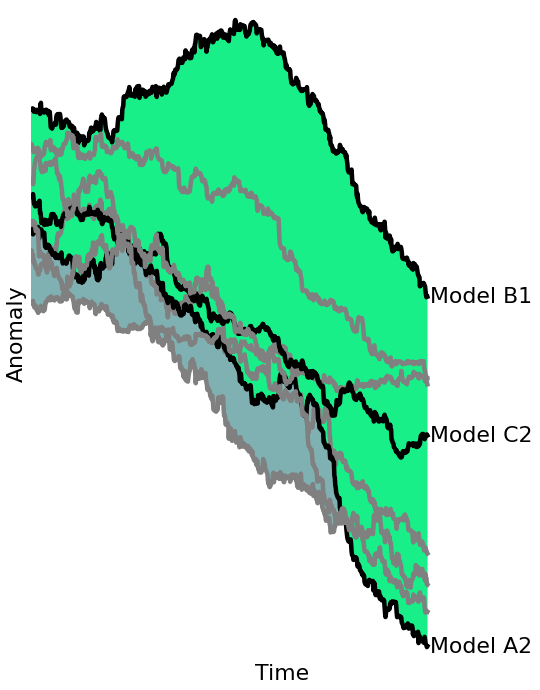

In [53]:
subset = cmip#['MIROC-ESM-CHEM' , 'BNU-ESM' , 'CNRM-CM5' , 'ACCESS1-0', 'GFDL-CM3', 'bcc-csm1-1-m']
fig,ax = plt.subplots(figsize=(9, 12))
    
    
selled['MIROC5'].plot(color = 'grey' , linewidth = 4.5) 

selled['MIROC-ESM-CHEM'].plot(color = 'black' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['MIROC-ESM-CHEM'].dropna(dim='time').values[-1]), xytext=(3,0), textcoords='offset points', text=str('Model A2'), va='center',color = 'black')


selled['ACCESS1-0'].plot(color = 'black' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['ACCESS1-0'].dropna(dim='time').values[-1]), xytext=(3,0), textcoords='offset points', text=str('Model B1'), va='center',color = 'black')
selled['GFDL-ESM2M'].plot(color = 'grey' , linewidth = 4.5) 



selled['BNU-ESM'].plot(color = 'grey' , linewidth = 4.5) 
selled['inmcm4'].plot(color = 'black' , linewidth = 4.5) 
ax.annotate(xy=(pd.to_datetime('2080/12/30'),selled['inmcm4'].dropna(dim='time').values[-1]), xytext=(3,0), textcoords='offset points', text=str('Model C2'), va='center',color = 'black')
selled['GISS-E2-R-CC'].plot(color = 'grey' , linewidth = 4.5) 



selled['CESM1-CAM5'].plot(color = 'grey' , linewidth = 4.5) 

x = sel_range
ax.fill_between(x.time, x.minimum,x.maximum, facecolor='cadetblue', alpha=0.8, label = 'Considered Ensemble')   


x = final_range
ax.fill_between(x.time, x.minimum,x.maximum, facecolor='springgreen', alpha=0.8, label = 'Considered Ensemble')   

ax.set_ylim(-3.3e-6,1.1e-6)
ax.set_xlim(pd.to_datetime('2010/01/01'), pd.to_datetime('2100/01/01'))
plt.ylabel('Anomaly')
plt.title('')
plt.xlabel('Time')
ax.set_xticks(ticks = [])
ax.set_yticks(ticks = [])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig('selection_method_final.png', dpi = 460)
plt.show()

In [162]:
import matplotlib
print('indigo', matplotlib.colors.cnames["indigo"])
print('teal', matplotlib.colors.cnames["teal"])
print('orange', matplotlib.colors.cnames["orange"])
print('limegreen', matplotlib.colors.cnames["limegreen"])

indigo #4B0082
teal #008080
orange #FFA500
limegreen #32CD32


In [245]:
end=[]
name=[]
for model in cmip:
    if model == 'IPSL-CM5B-LR' or model == 'CMCC-CMS':
        pass
    else:
        name.append(model)
        end.append(selled[model].values[-1])

In [246]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [247]:
name[find_nearest(end, selled['IPSL-CM5B-LR'].values[-1])]

'MIROC-ESM-CHEM'

In [260]:
name[np.argmin(end)]

'GISS-E2-H-CC'

In [130]:
col_dic

{'MIROC5': '#ff00bb',
 'MRI-CGCM3': '#ff00bb',
 'MRI-ESM1': '#ff00bb',
 'IPSL-CM5A-LR': '#ff00bb',
 'IPSL-CM5A-MR': '#ff00bb',
 'BNU-ESM': '#ffee00',
 'CMCC-CESM': '#ffee00',
 'MIROC-ESM-CHEM': '#ffee00',
 'FGOALS-g2': '#ff1100',
 'IPSL-CM5B-LR': '#ff1100',
 'HadCM3': '#00ff1e',
 'CanESM2': '#00ff1e',
 'bcc-csm1-1': '#00ff1e',
 'MPI-ESM-MR': '#ffee00',
 'MPI-ESM-LR': '#00ff1e',
 'MPI-ESM-P': '#00ff1e',
 'CNRM-CM5': '#ffee00',
 'CMCC-CM': '#ffee00',
 'CMCC-CMS': '#ffee00',
 'HadGEM2-AO': '#ffee00',
 'NorESM1-M': '#ffee00',
 'HadGEM2-CC': '#00ff1e',
 'ERA5': '#00ff1e',
 'bcc-csm1-1-m': '#00ff1e',
 'ACCESS1-0': '#00ff1e',
 'ACCESS1-3': '#00ff1e',
 'GFDL-CM3': '#ffee00',
 'GFDL-ESM2G': '#ffee00',
 'GFDL-ESM2M': '#ffee00'}